# DATA GATHERING

In [193]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [245]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [291]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataframe/combinedDataframe_1 29920.csv')
df_50 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataframe/combinedDataframe_1 51306.csv')

In [292]:
print("Jumlah baris:", df.shape)
print("Jumlah baris:", df_50.shape)

Jumlah baris: (29919, 29)
Jumlah baris: (51305, 31)


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29919 entries, 0 to 29918
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   description               29516 non-null  object 
 1   facilities_text           17912 non-null  object 
 2   facility_jogging_track    4 non-null      object 
 3   facility_lapangan_tenis   2 non-null      object 
 4   fasilitas_perumahan_text  14901 non-null  object 
 5   fasilitas_rumah_text      16430 non-null  object 
 6   installment_info          29059 non-null  object 
 7   location                  29659 non-null  object 
 8   original_price            2672 non-null   object 
 9   original_price_numeric    2672 non-null   float64
 10  perabotan_text            10665 non-null  object 
 11  poi_perbelanjaan_text     5586 non-null   object 
 12  poi_sekolah_text          5635 non-null   object 
 13  poi_structured_text       9423 non-null   object 
 14  poi_te

In [284]:
df_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51305 entries, 0 to 51304
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   description                     50583 non-null  object 
 1   facilities_text                 29630 non-null  object 
 2   facility_jogging_track          8 non-null      object 
 3   facility_lapangan_basket        3 non-null      object 
 4   facility_lapangan_bulu_tangkis  2 non-null      object 
 5   fasilitas_perumahan_text        24871 non-null  object 
 6   fasilitas_rumah_text            27233 non-null  object 
 7   installment_info                50219 non-null  object 
 8   location                        50819 non-null  object 
 9   original_price                  3461 non-null   object 
 10  original_price_numeric          3461 non-null   float64
 11  perabotan_text                  17096 non-null  object 
 12  poi_perbelanjaan_text           

# RENAME FEATURE

In [288]:
def rename_feature(df):
    column_mapping = {
        'installment_info': 'monthly_installment_info',
        'price': 'price_display',
        'location': 'location',
        'savings': 'estimated_savings',
        'poi_structured_text': 'nearby_points_of_interest',
        'url': 'source_url',
        'updated_date': 'updatedAt',
        'facilities_text': 'facilities',
        'specifications_text':'specifications'
    }

    df.rename(columns=column_mapping, inplace=True)

    cols_to_drop = [
        'facility_jogging_track', 'facility_lapangan_tenis',
        'fasilitas_perumahan_text', 'fasilitas_rumah_text', 'perabotan_text',
        'poi_perbelanjaan_text', 'poi_sekolah_text', 'poi_text', 'poi_transportasi_text',
        'original_price', 'original_price_numeric', 'facility_lapangan_voli','facility_lapangan_basket',
        'facility_tempat_gym', 'facility_lapangan_bola ', 'facility_lapangan_bulu_tangkis'
    ]

    df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

    if 'updatedAt' in df.columns:
        df['updatedAt'] = pd.to_datetime(df['updatedAt'], errors='coerce')

    return df

In [250]:
rename_df = rename_feature(df)

rename_df.to_csv('rename_df.csv', index=False)

In [251]:
rename_df.head(2)

,description,facilities,monthly_installment_info,location,nearby_points_of_interest,posted_by,price_display,price_numeric,property_type,estimated_savings,specifications,title,updatedAt,source_url,error
0,Frans cen-Jual rumah di casajardin..cluster..w...,NaN,Cicilan mulai Rp 25 Jutaan/bulan,"Daan Mogot, Jakarta Barat",NaN,frans cen,Rp 5 Miliar,5.000000e+09,Rumah,NaN,kamar tidur: 4; kamar mandi: 4; luas tanah: 19...,Frans cen-Jual rumah di casajardin..cluster..wow,NaT,https://www.rumah123.com/properti/jakarta-bara...,NaN
1,"Luas Tanah 19,5 x 19,5 = 380 m2. \nLuas Bangun...",NaN,Cicilan mulai Rp 64 Jutaan/bulan,"Permata Buana, Jakarta Barat",NaN,Ade Astuti,"Rp 12,5 Miliar",1.250000e+10,Rumah,NaN,kamar tidur: 5; kamar mandi: 4; luas tanah: 38...,Dijual Rumah Komplek Permata Buana,NaT,https://www.rumah123.com/properti/jakarta-bara...,NaN


In [252]:
rename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29919 entries, 0 to 29918
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   description                29516 non-null  object        
 1   facilities                 17912 non-null  object        
 2   monthly_installment_info   29059 non-null  object        
 3   location                   29659 non-null  object        
 4   nearby_points_of_interest  9423 non-null   object        
 5   posted_by                  29659 non-null  object        
 6   price_display              29659 non-null  object        
 7   price_numeric              29659 non-null  float64       
 8   property_type              29659 non-null  object        
 9   estimated_savings          2672 non-null   object        
 10  specifications             29659 non-null  object        
 11  title                      29657 non-null  object        
 12  upda

# EXTRACT FACILITIES

In [253]:
def extract_facilities(facilities_string):
    if pd.isna(facilities_string):
        return []
    return [facility.strip().lower() for facility in facilities_string.split(',')]

rename_df['facilities_list'] = rename_df['facilities'].apply(extract_facilities)
all_facilities = [item for sublist in rename_df['facilities_list'].tolist() for item in sublist]
unique_facilities = set(all_facilities)

prefix_to_remove = 'f_'
for col in rename_df.columns:
    if col.startswith(prefix_to_remove):
        rename_df.drop(columns=[col], inplace=True)

for facility in unique_facilities:
    clean_name = facility.replace(" ", "_").replace("-", "_").replace("(", "").replace(")", "").replace(".", "").lower()
    feature_name = f'f_{clean_name}'

    rename_df[feature_name] = rename_df['facilities'].apply(
        lambda x: 1 if isinstance(x, str) and facility.lower() in x.lower() else 0
    )

rename_df.drop(columns=['facilities_list'], inplace=True)

In [254]:
print(f"Jumlah fitur fasilitas unik: {len(unique_facilities)}")

rename_df.head(2)

Jumlah fitur fasilitas unik: 27


,description,facilities,monthly_installment_info,location,nearby_points_of_interest,posted_by,price_display,price_numeric,property_type,estimated_savings,...,f_kulkas,f_keamanan_24_jam,f_tempat_jemuran,f_masjid,f_lapangan_voli,f_kolam_renang,f_akses_parkir,f_lapangan_basket,f_backyard,f_wastafel
0,Frans cen-Jual rumah di casajardin..cluster..w...,NaN,Cicilan mulai Rp 25 Jutaan/bulan,"Daan Mogot, Jakarta Barat",NaN,frans cen,Rp 5 Miliar,5.000000e+09,Rumah,NaN,...,0,0,0,0,0,0,0,0,0,0
1,"Luas Tanah 19,5 x 19,5 = 380 m2. \nLuas Bangun...",NaN,Cicilan mulai Rp 64 Jutaan/bulan,"Permata Buana, Jakarta Barat",NaN,Ade Astuti,"Rp 12,5 Miliar",1.250000e+10,Rumah,NaN,...,0,0,0,0,0,0,0,0,0,0


In [255]:
rename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29919 entries, 0 to 29918
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   description                29516 non-null  object        
 1   facilities                 17912 non-null  object        
 2   monthly_installment_info   29059 non-null  object        
 3   location                   29659 non-null  object        
 4   nearby_points_of_interest  9423 non-null   object        
 5   posted_by                  29659 non-null  object        
 6   price_display              29659 non-null  object        
 7   price_numeric              29659 non-null  float64       
 8   property_type              29659 non-null  object        
 9   estimated_savings          2672 non-null   object        
 10  specifications             29659 non-null  object        
 11  title                      29657 non-null  object        
 12  upda

# EXTRACT SPECIFICATIONS

In [256]:
rename_df['specifications']

,specifications
0,kamar tidur: 4; kamar mandi: 4; luas tanah: 19...
1,kamar tidur: 5; kamar mandi: 4; luas tanah: 38...
2,kamar tidur: 3; kamar mandi: 3; luas tanah: 24...
3,kamar tidur: 4; kamar mandi: 3; luas tanah: 14...
4,kamar tidur: 3; kamar mandi: 3; luas tanah: 15...
...,...
29914,kamar tidur: 3; kamar mandi: 3; luas tanah: 71...
29915,kamar tidur: 3; kamar mandi: 2; luas tanah: 39...
29916,kamar tidur: 5; kamar mandi: 5; luas tanah: 33...
29917,kamar tidur: 4; kamar mandi: 3; luas tanah: 53...


In [257]:
unique_spec_items = set()

for spec in rename_df['specifications']:
    if pd.isna(spec):
        continue
    parts = spec.split(';')
    for part in parts:
        if ':' in part:
            key = part.split(':')[0].strip()
            unique_spec_items.add(key)

sorted_spec_items = sorted(unique_spec_items)

print("Item unik dalam kolom 'specifications':")
for item in sorted_spec_items:
    print(f"- {item}")

Item unik dalam kolom 'specifications':
- carport
- daya listrik
- garasi
- jumlah lantai
- kamar mandi
- kamar mandi pembantu
- kamar tidur
- kamar tidur pembantu
- kondisi properti
- luas bangunan
- luas tanah
- sertifikat


In [258]:
required_properties = {
    'carport', 'daya listrik', 'garasi', 'jumlah lantai',
    'kamar mandi', 'kamar mandi pembantu', 'kamar tidur',
    'kamar tidur pembantu', 'kondisi properti', 'luas bangunan',
    'luas tanah', 'sertifikat'
}

def parse_specifications(spec):
    if pd.isna(spec) or spec == "":
        return {}
    spec_dict = {}
    for part in spec.split(';'):
        if ':' in part:
            key, value = part.split(':', 1)
            normalized_key = key.strip().lower()
            spec_dict[normalized_key] = value.strip()
    return spec_dict

parsed_specs = rename_df['specifications'].apply(parse_specifications)

for prop in required_properties:
    normalized_prop = prop.lower()
    feature_name = f's_{normalized_prop.replace(" ", "_")}'
    rename_df[feature_name] = parsed_specs.apply(lambda x: 1 if normalized_prop in x else 0)

rename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29919 entries, 0 to 29918
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   description                29516 non-null  object        
 1   facilities                 17912 non-null  object        
 2   monthly_installment_info   29059 non-null  object        
 3   location                   29659 non-null  object        
 4   nearby_points_of_interest  9423 non-null   object        
 5   posted_by                  29659 non-null  object        
 6   price_display              29659 non-null  object        
 7   price_numeric              29659 non-null  float64       
 8   property_type              29659 non-null  object        
 9   estimated_savings          2672 non-null   object        
 10  specifications             29659 non-null  object        
 11  title                      29657 non-null  object        
 12  upda

# CLEAR MONTHLY INSTALLMENT FORMAT

In [259]:
def clean_monthly_installment(value):
    if pd.isna(value):
        return 0

    match = re.search(r'(\d+)\s*Jutaan', str(value))
    if match:
        juta = int(match.group(1))
        return juta * 1_000_000
    else:
        numbers = re.findall(r'\d+', str(value))
        if numbers:
            return int(numbers[0]) * 1_000_000
        return 0

rename_df['monthly_installment_info'] = rename_df['monthly_installment_info'].apply(clean_monthly_installment)

rename_df['monthly_installment_info'] = pd.to_numeric(rename_df['monthly_installment_info'], errors='coerce')

In [260]:
rename_df['monthly_installment_info'].unique()

array([ 25000000,  64000000,         0,  23000000,  24000000,   6000000,
        19000000,  20000000,  29000000,  32000000,  30000000,  41000000,
        35000000,   4000000,  77000000,  36000000,  56000000,  10000000,
        14000000,  69000000,  15000000,  40000000,  61000000,  38000000,
        11000000,  13000000,  18000000,  51000000,  34000000,  45000000,
        12000000,  27000000, 146000000,   7000000,  16000000,  28000000,
         9000000,  37000000,  72000000, 133000000,  80000000,  87000000,
        65000000,  42000000,  17000000,  33000000,  21000000,  39000000,
        79000000,  46000000,  59000000,  22000000,  67000000, 154000000,
        48000000,  71000000, 128000000,  47000000,  26000000,   3000000,
        84000000, 205000000,  97000000, 175000000, 334000000,  43000000,
        54000000,   5000000,   8000000,  92000000,  95000000,  76000000,
       246000000,  50000000, 102000000, 257000000, 195000000,  66000000,
        70000000,  86000000, 118000000, 148000000, 

# EXTRACT POI

In [261]:
non_null_values = rename_df[rename_df['nearby_points_of_interest'].notna()]['nearby_points_of_interest']

unique_values = set(non_null_values)

print(f"Jumlah data kosong: {rename_df['nearby_points_of_interest'].isna().sum()}\n")
print("Nilai unik di kolom 'nearby_points_of_interest':")
for value in sorted(unique_values):
    print(f"- {value}")


Jumlah data kosong: 20496

Nilai unik di kolom 'nearby_points_of_interest':
- Perbelanjaan: Koja Trade Mall; Sekolah: SMAN 13 Jakarta, SMKS Al Khairiyah 2
- Perbelanjaan: Lippo Mall Kemang
- Perbelanjaan: Lippo Mall Puri, PIM
- Perbelanjaan: Mall of Indonesia, Summarecon Mall Kelapa Gading; Sekolah: SMAS Don Bosco 1
- Sekolah: BINUS Kemanggisan, Sekolah Sang Timur Kebon Jeruk
- Sekolah: BINUS Syahdan, SMAN 16 Jakarta
- Sekolah: Onesticker
- Sekolah: SMAN 13 Jakarta, SMKS Al Khairiyah 2
- Sekolah: STIE Dr. Moechtar Talib
- Sekolah: STIE KUSUMA NEGARA
- Sekolah: STIKOM CKI (Gedung Lama)
- Sekolah: STIP Jakarta
- Sekolah: Sekolah Tinggi Ilmu Ekonomi Swadaya
- Sekolah: UMIBA Jakarta (Universitas Mitra Bangsa Jakarta)
- Sekolah: Universitas Mpu Tantular Kampus B
- Sekolah: Yayasan Rumah Rachel
- Sekolah: i3L School of Business (iSB)
- Transportasi: Bandara Halim, Pinang Ranti, Pintu Tol Kampung Dukuh, Stasiun LRT TMII, Stasiun LRT Halim
- Transportasi: Cititrans Central Park, Halte TransJak

In [262]:
rename_df['nearby_points_of_interest']

,nearby_points_of_interest
0,NaN
1,NaN
2,"Sekolah: BINUS Kemanggisan, Sekolah Sang Timur..."
3,NaN
4,NaN
...,...
29914,NaN
29915,NaN
29916,"Transportasi: MRT Fatmawati, MRT Haji Nawi, St..."
29917,Transportasi: Pintu Tol Veteran; Sekolah: Moes...


In [263]:
from os import rename
import pandas as pd

def extract_poi_categories(poi_string):
    if pd.isna(poi_string) or poi_string == "":
        return set()
    categories = set()
    for item in poi_string.split(';'):
        if ':' in item:
            category = item.split(':')[0].strip().lower()
            categories.add(category)
    return categories

all_poi_categories = set()
for poi in rename_df['nearby_points_of_interest']:
    categories = extract_poi_categories(poi)
    all_poi_categories.update(categories)

for category in sorted(all_poi_categories):
    feature_name = f'poi_{category}'
    rename_df[feature_name] = rename_df['nearby_points_of_interest'].apply(
        lambda x: 1 if category in extract_poi_categories(x) else 0
    )

def clean_poi(value):
    if pd.isna(value) or value.strip() == "":
        return ""
    parts = value.split(';')
    cleaned_parts = []
    for part in parts:
        if ':' in part:
            content = part.split(':', 1)[1].strip()
        else:
            content = part.strip()
        cleaned_parts.append(content.lower())
    return '; '.join(cleaned_parts)

rename_df['nearby_points_of_interest'] = rename_df['nearby_points_of_interest'].apply(clean_poi)

rename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29919 entries, 0 to 29918
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   description                29516 non-null  object        
 1   facilities                 17912 non-null  object        
 2   monthly_installment_info   29919 non-null  int64         
 3   location                   29659 non-null  object        
 4   nearby_points_of_interest  29919 non-null  object        
 5   posted_by                  29659 non-null  object        
 6   price_display              29659 non-null  object        
 7   price_numeric              29659 non-null  float64       
 8   property_type              29659 non-null  object        
 9   estimated_savings          2672 non-null   object        
 10  specifications             29659 non-null  object        
 11  title                      29657 non-null  object        
 12  upda

# EXTRACT LOCATION

In [264]:
rename_df['location'].unique()

array(['Daan Mogot, Jakarta Barat', 'Permata Buana, Jakarta Barat',
       'Kebon Jeruk, Jakarta Barat', 'Puri Indah, Jakarta Barat',
       'Citra Garden, Jakarta Barat', 'Metland Puri, Jakarta Barat',
       'Taman Palem, Jakarta Barat', 'Green garden, Jakarta Barat',
       'Taman Cosmos, Jakarta Barat', 'Intercon, Jakarta Barat',
       'Tawakal, Jakarta Barat', 'Kedoya, Jakarta Barat',
       'Tomang, Jakarta Barat', 'Kalideres, Jakarta Barat',
       'Semanan, Jakarta Barat', 'Tamansari, Jakarta Barat',
       'Alfa Indah, Jakarta Barat', 'Kemanggisan, Jakarta Barat',
       'Puri Mansion, Jakarta Barat', 'Meruya, Jakarta Barat',
       'Mangga Besar, Jakarta Barat', 'Kembangan, Jakarta Barat',
       'Cengkareng, Jakarta Barat', 'Taman Ratu, Jakarta Barat',
       'Sunrise Garden, Jakarta Barat', 'Palmerah, Jakarta Barat',
       'Duri Kepa, Jakarta Barat', 'Duri Kosambi, Jakarta Barat',
       'Puri Media, Jakarta Barat', 'Green Ville, Jakarta Barat',
       'Green Lake City, J

In [265]:


def extract_kabupaten(location):
    if pd.isna(location):
        return None
    try:
        kabupaten = location.split(',', 1)[1].strip().lower()
        return kabupaten
    except IndexError:
        return None

rename_df['kabupaten'] = rename_df['location'].apply(extract_kabupaten)

# Tampilkan hasil
print("Contoh data dengan fitur kabupaten:")
print(rename_df[['location', 'kabupaten']].head())

print("\nNilai unik di kolom 'kabupaten':")
print(rename_df['kabupaten'].unique())

Contoh data dengan fitur kabupaten:
                       location      kabupaten
0     Daan Mogot, Jakarta Barat  jakarta barat
1  Permata Buana, Jakarta Barat  jakarta barat
2    Kebon Jeruk, Jakarta Barat  jakarta barat
3     Puri Indah, Jakarta Barat  jakarta barat
4   Citra Garden, Jakarta Barat  jakarta barat

Nilai unik di kolom 'kabupaten':
['jakarta barat' None 'jakarta pusat' 'jakarta selatan' 'jakarta timur'
 'jakarta utara']


In [266]:

le = LabelEncoder()
rename_df['kabupaten_encoded'] = le.fit_transform(rename_df['kabupaten'].astype(str))

In [267]:
rename_df['kabupaten_encoded'].unique()

array([1, 0, 2, 3, 4, 5])

# EXTRACT ESTIMATED SAVINGS

In [268]:
rename_df['estimated_savings'].unique()

array([nan, '51 Jutaan', 'Rp 250 Jutaan', 'Rp 2000 Miliaran',
       '150 Jutaan', 'Rp 40 Jutaan', 'Rp 500 Jutaan', 'Rp 50 Jutaan',
       'Rp 251 Jutaan', 'Rp 200 Jutaan', 'Rp 1000 Jutaan',
       'Rp 1001 Miliaran', 'Rp 400 Jutaan', 'Rp 800 Jutaan',
       'Rp 350 Jutaan', 'Rp 201 Jutaan', 'Rp 100 Jutaan', '501 Jutaan',
       'Rp 10 Jutaan', 'Rp 600 Jutaan', 'Rp 501 Jutaan', 'Rp 110 Jutaan',
       'Rp 300 Jutaan', 'Rp 1201 Miliaran', 'Rp 101 Jutaan', '251 Jutaan',
       'Rp 80 Jutaan', 'Rp 70 Jutaan', 'Rp 700 Jutaan', 'Rp 301 Jutaan',
       'Rp 391 Jutaan', 'Rp 601 Jutaan', '600 Jutaan', 'Rp 20 Jutaan',
       'Rp 311 Jutaan', 'Rp 59 Jutaan', 'Rp 51 Jutaan', 'Rp 150 Jutaan',
       'Rp 151 Jutaan', 'Rp 900 Jutaan', '146 Jutaan', 'Rp 98 Jutaan',
       '401 Jutaan', '550 Jutaan', 'Rp 1750 Miliaran', 'Rp 76 Jutaan',
       '10 Jutaan', '480 Jutaan', 'Rp 230 Jutaan', 'Rp 450 Jutaan',
       '250 Jutaan', 'Rp 60 Jutaan', 'Rp 1250 Miliaran', '2 Miliaran',
       '30 Jutaan', 'Rp 91 Ju

In [269]:


def clean_estimated_savings(value):
    if pd.isna(value):
        return 0

    value = str(value).lower()

    juta_match = re.search(r'(\d+[\d,.]*)\s*juta', value)
    miliar_match = re.search(r'(\d+[\d,.]*)\s*miliar', value)
    ribu_match = re.search(r'(\d+[\d,.]*)\s*ribu', value)

    if juta_match:
        number = float(juta_match.group(1).replace(',', '.'))
        return number * 1_000_000
    elif miliar_match:
        number = float(miliar_match.group(1).replace(',', '.'))
        return number * 1_000_000_000
    elif ribu_match:
        number = float(ribu_match.group(1).replace(',', '.'))
        return number * 1_000
    else:
        numbers = re.findall(r'\d+[\d,.]*', value)
        if numbers:
            number = float(numbers[0].replace(',', '.'))
            return number
        return 0

rename_df['estimated_savings'] = rename_df['estimated_savings'].apply(clean_estimated_savings)

rename_df['estimated_savings'] = pd.to_numeric(rename_df['estimated_savings'], errors='coerce')

In [270]:
rename_df['estimated_savings']

,estimated_savings
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
29914,0.0
29915,0.0
29916,0.0
29917,0.0


# SPLIT DF TO DF_SPECS AND DF_FACILITIES

In [271]:
rename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29919 entries, 0 to 29918
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   description                29516 non-null  object        
 1   facilities                 17912 non-null  object        
 2   monthly_installment_info   29919 non-null  int64         
 3   location                   29659 non-null  object        
 4   nearby_points_of_interest  29919 non-null  object        
 5   posted_by                  29659 non-null  object        
 6   price_display              29659 non-null  object        
 7   price_numeric              29659 non-null  float64       
 8   property_type              29659 non-null  object        
 9   estimated_savings          29919 non-null  float64       
 10  specifications             29659 non-null  object        
 11  title                      29657 non-null  object        
 12  upda

In [272]:
spec_columns = [col for col in rename_df.columns if col.startswith('s_')]

facility_columns = [col for col in rename_df.columns if col.startswith('f_')]

base_columns = ['monthly_installment_info','kabupaten_encoded', 'price_numeric','estimated_savings']

df_specs = rename_df[base_columns + spec_columns].copy()

df_facilities = rename_df[base_columns + facility_columns].copy()

print("Info df_specs:")
df_specs.info()
print("\nInfo df_facilities:")
df_facilities.info()


Info df_specs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29919 entries, 0 to 29918
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   monthly_installment_info  29919 non-null  int64  
 1   kabupaten_encoded         29919 non-null  int64  
 2   price_numeric             29659 non-null  float64
 3   estimated_savings         29919 non-null  float64
 4   s_kamar_mandi_pembantu    29919 non-null  int64  
 5   s_luas_tanah              29919 non-null  int64  
 6   s_carport                 29919 non-null  int64  
 7   s_garasi                  29919 non-null  int64  
 8   s_kondisi_properti        29919 non-null  int64  
 9   s_kamar_mandi             29919 non-null  int64  
 10  s_daya_listrik            29919 non-null  int64  
 11  s_kamar_tidur_pembantu    29919 non-null  int64  
 12  s_kamar_tidur             29919 non-null  int64  
 13  s_jumlah_lantai           29919 non-null  int6

#

# EDA

In [273]:
corr_specs = df_specs.corr()
corr_facilities = df_facilities.corr()

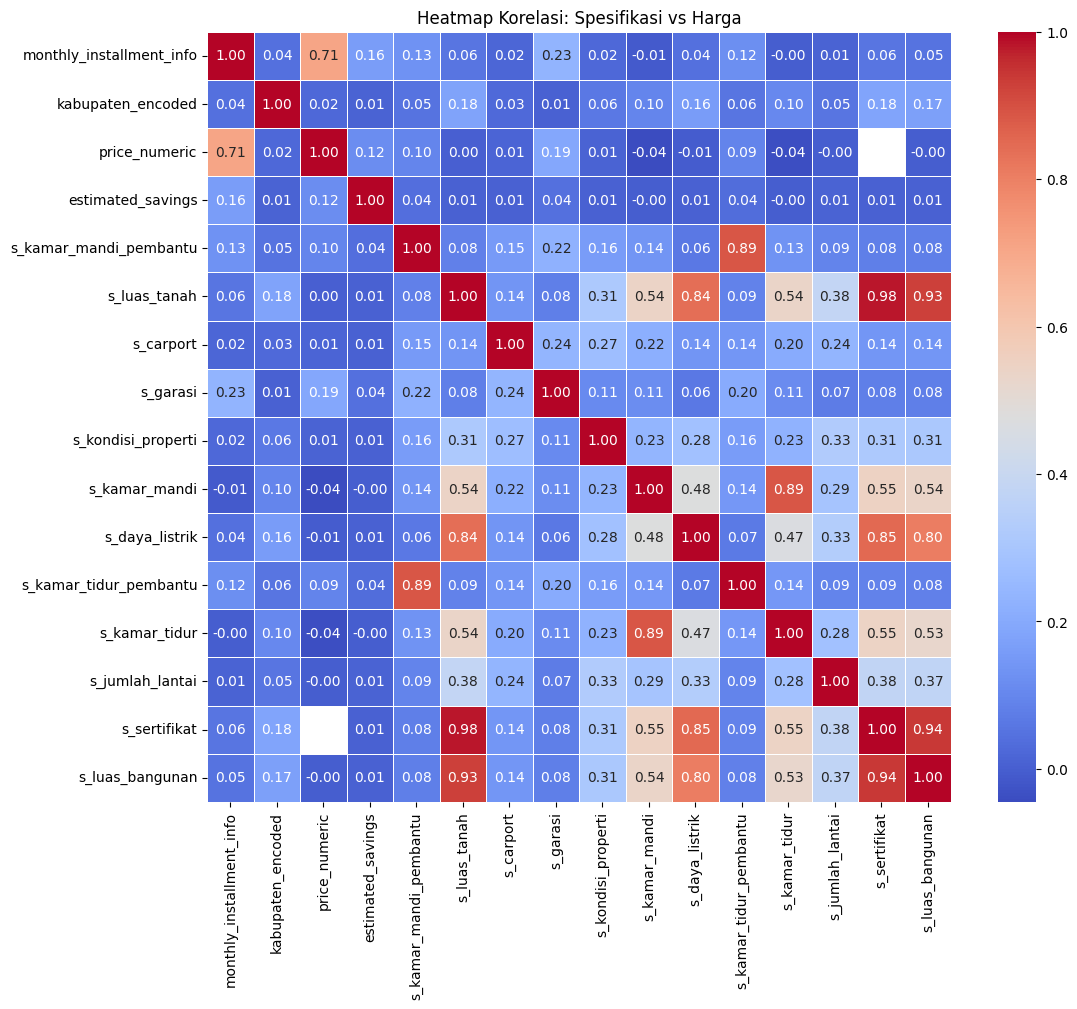

In [274]:


plt.figure(figsize=(12, 10))
sns.heatmap(corr_specs, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi: Spesifikasi vs Harga")
plt.show()

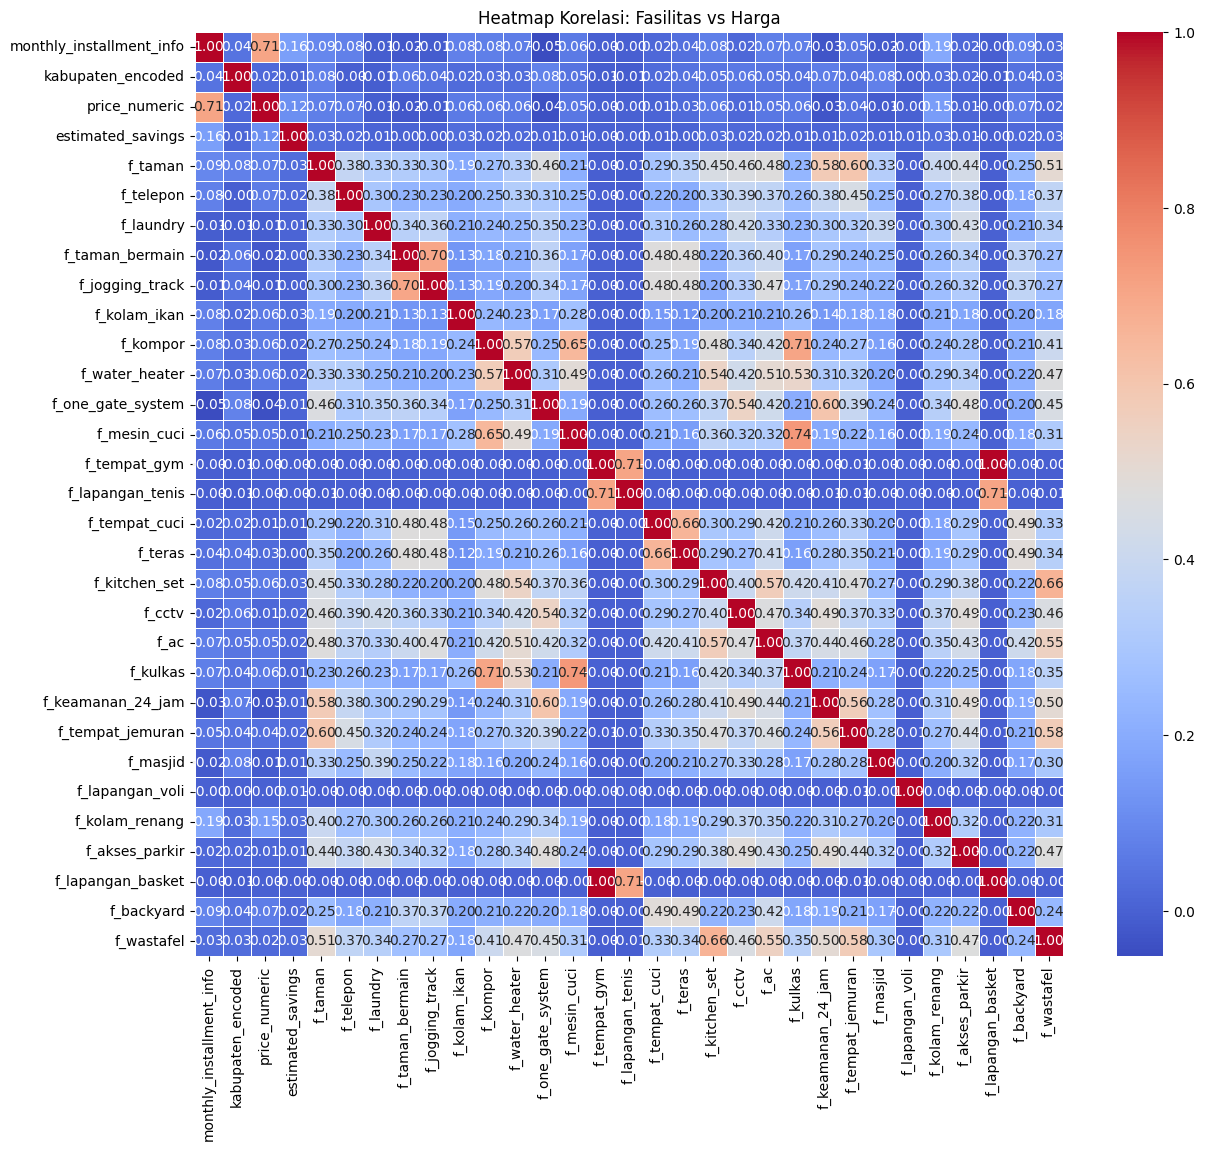

In [275]:
plt.figure(figsize=(14, 12))
sns.heatmap(corr_facilities, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi: Fasilitas vs Harga")
plt.show()

In [276]:
price_corr_specs = corr_specs[['price_numeric']].drop('price_numeric') # Hilangkan korelasi 1 dengan dirinya sendiri
price_corr_facilities = corr_facilities[['price_numeric']].drop('price_numeric') # Hilangkan korelasi 1 dengan dirinya sendiri

all_price_correlations = pd.concat([price_corr_specs, price_corr_facilities])

ranked_correlations = all_price_correlations.squeeze().abs().sort_values(ascending=False)

ranked_correlations_with_sign = all_price_correlations.loc[ranked_correlations.index].squeeze()

unique_correlations = ranked_correlations_with_sign[~ranked_correlations_with_sign.index.duplicated(keep='first')]

print("Korelasi Unik dengan Price_Numeric (Tanpa Duplikat, Berdasarkan Ranking Absolut):")
unique_correlations

Korelasi Unik dengan Price_Numeric (Tanpa Duplikat, Berdasarkan Ranking Absolut):


,price_numeric
monthly_installment_info,0.706540
s_garasi,0.188268
f_kolam_renang,0.152146
estimated_savings,0.116297
s_kamar_mandi_pembantu,0.096074
s_kamar_tidur_pembantu,0.090406
f_taman,0.073943
f_backyard,0.071214
f_telepon,0.065562
f_kitchen_set,0.062566
